## Single-Layer Neural Networks

**Perceptron Alogrithm to determine the type of Eryhemato-Squamous Disease**

example implemented with and without scikit to compare results

@see data <br>
https://archive.ics.uci.edu/ml/datasets/dermatology

-------------------------------------
results first test
-------------------------------------

weights:  [1085.2  890.3  755. ]

sum-of-squared error loss function: [190.5, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0, 188.0]

accuracy score:  0.22727272727272727


-------------------------------------
results second test
-------------------------------------

sklearn weights:  [-0.1 -0.1  0.1]
perceptron weights:  [1085.2  890.3  755. ]


/home/leo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


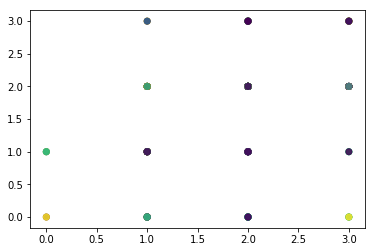

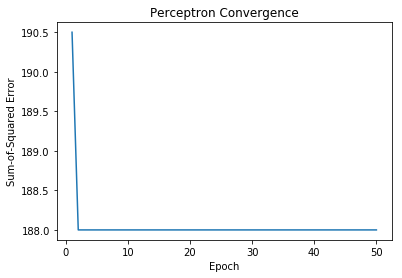

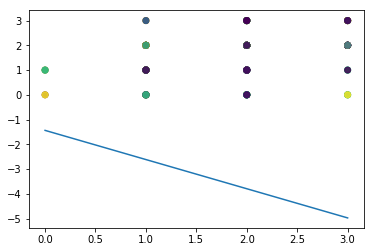

In [50]:
"""
Perceptron Algorithm from Scratch.

The first part of this code is training and testing a Perceptron algorithm 
from scratch.

The final part compares the results from a scikit-learn Perceptron with the 
algorithm implemented from scratch in the first part.
"""


# impoort libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

# load data 
dataset = pd.read_csv("./data/dermatology_dataset_normalized.csv")

# plot data to view
obs = 1000
plt.figure(0)
plt.scatter(dataset.values[:,1], dataset.values[:,2], c = dataset['3'], alpha=0.8)

# split the data into train/test sets
# add values from dataset to numpay array
dataset = dataset.values  
                
np.random.seed(5)
np.random.shuffle(dataset)

# 70% train/30% test
train = dataset[0:int(0.7*len(dataset))]
test = dataset[int(0.7*len(dataset)):int(len(dataset))]

x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]

# training the perceptron.
# the output will be the weights (w) and the sum-of-squared error loss function (J)
def perceptron_train(x, y, z, eta, t):
#     params:
#         x: data set of input features
#         y: actual outputs
#         z: activation function threshold
#         eta: learning rate
#         t: number of iterations
    
    # set values in the weights
    w = np.zeros(len(x[0]))      
    n = 0                        
    
    yhat_vec = np.ones(len(y))     # predictions
    errors = np.ones(len(y))       # errors
    J = []                         # vector for the SSE cost function
    
    while n < t: 
        for i in range(0, len(x)):                 
            
            # dot product
            f = np.dot(x[i], w)   
                  
            # activation function
            if f >= z:                               
                yhat = 1.                               
            else:                                   
                yhat = 0.
            yhat_vec[i] = yhat
            
            # updating the weights
            for j in range(0, len(w)):             
                w[j] = w[j] + eta*(y[i]-yhat)*x[i][j]
                
        n += 1
        # computing the sum-of-squared errors
        for i in range(0,len(y)):     
           errors[i] = (y[i]-yhat_vec[i])**2
        J.append(0.5*np.sum(errors))
        
    return w, J

z = 0.0
eta = 0.1
t = 50

perceptron_train(x_train, y_train, z, eta, t)

w = perceptron_train(x_train, y_train, z, eta, t)[0]
J = perceptron_train(x_train, y_train, z, eta, t)[1]

print("-------------------------------------")
print("results first test")
print("-------------------------------------\n")
print("weights: ", w)
print("\nsum-of-squared error loss function:", J)

J = perceptron_train(x_train, y_train, z, eta, t)[1]
epoch = np.linspace(1,len(J),len(J))

plt.figure(1)
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')

# testing the model using the accuracy score from sklearn.metrics
w = perceptron_train(x_train, y_train, z, eta, t)[0]

def perceptron_test(x, w, z, eta, t):
    y_pred = []
    for i in range(0, len(x-1)):
        f = np.dot(x[i], w)   

        # activation function
        if f > z:                               
            yhat = 1                               
        else:                                   
            yhat = 0
        y_pred.append(yhat)
    return y_pred

y_pred = perceptron_test(x_test, w, z, eta, t)

print("\naccuracy score: ", accuracy_score(y_test, y_pred))

# plot the decision boundary
min = np.min(x_test[:,1])
max = np.max(x_test[:,1])
x1 = np.linspace(min,max,100)

def x2(x1, w):
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    x2 = []
    for i in range(0, len(x1-1)):
        x2_temp = (-w0-w1*x1[i])/w2
        x2.append(x2_temp)
    return x2

x_2 = np.asarray(x2(x1,w))

# loda data to do tests with scikit and compare
dataset = pd.read_csv("./data/dermatology_dataset_normalized.csv")

obs = 1000
plt.figure(2)
plt.scatter(dataset.values[:,1], dataset.values[:,2], c = dataset['3'], alpha=0.8)
plt.plot(x1, x_2)

# making a prediction with the sklearn Perceptron
# training the sklearn Perceptron
clf = Perceptron(random_state=None, eta0=0.1, shuffle=False, fit_intercept=False)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("\n\n-------------------------------------")
print("results second test");
print("-------------------------------------\n")
print("sklearn weights: ", clf.coef_[0])
print("perceptron weights: ", w)
